# Linear Regression
### Jack Bennetto
#### January 24, 2017


## Objectives

 * State the assumptions of a linear-regression model
 * Estimate a linear-regression model
 * Evaluate a linear-regression model
 * Fix common problems that could compromise results

## Agenda

Morning

 * Introduction to regression
 * Simple linear regression
 * Multiple linear regression
 * Assumptions for/limitations of linear regression
 
Afternoon

 * Assessing accuracy and comparing models
 * Outliers
 * Categorical variables

**Linear Regression** is

 * A *supervised* (as opposed to unsupervised, meaning that the features/covariate/independent variables/X fit to a label/outcome/target/dependent variable),
 * *regression* (as oppose to classification, meaning the target is numeric rather than catagorical), 
 * *parametric* model (as opposed to nonparametric model, meaning that there are a known and relatively small number of model parameters to fit).

Advantages:
 * Simple
 * Few hyper-parameters
 * Easy to explain
 * Interpretable
 * Fast
 
Disadvantages:
 * Can't capture complex relationships without feature engineering
 * Relies on certain assumptions
 * Doesn't work if n < p
 * Vulnerable to outliers
 

In [227]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as scs
import numpy as np
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

## Simple linear regression

The basic linear regression model is

$$y = \beta_0 + \beta_1 X + \epsilon$$

where $\beta_0$ and $\beta_1$, the intercept and the slope, are unknown parameters, and the error term

$$\epsilon \sim N(0, \sigma)$$

is i.i.d. (independent and identially distributed).

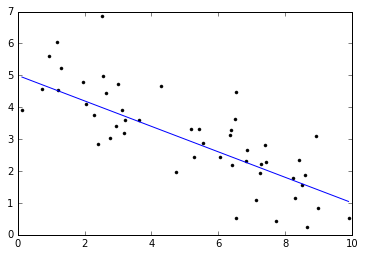

In [222]:
n = 50
b0 = 5
b1 = -0.4
x = scs.uniform(0,10).rvs(n)
y = b0 + b1*x + scs.norm(0,1).rvs(n)
xmin = x.min()
xmax = x.max()
plt.plot(x, y, 'k.')
plt.plot([xmin, xmax], [b0+b1*xmin, b0+b1*xmax], 'b-')

...except we don't know $\beta_0$ and $\beta_1$, so we have to estimate them. We call these estimates $\hat{\beta_0}$ and $\hat{\beta_1}$, and $\hat{y_i}$ are the estimated values for $y_i$ based on these coefficients.

## Residuals

The **residuals** are given by

$$\epsilon_i = y_i - \hat{y_i}$$

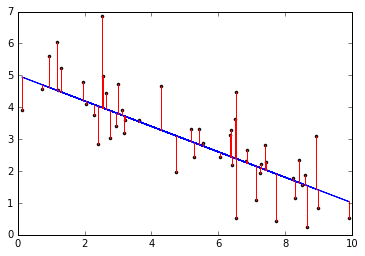

In [223]:
plt.plot(x, y, 'k.')
plt.plot(x, b0+b1*x, 'b-')
for xi, yi in zip(x,y):
    plt.plot([xi, xi], [yi, b0 + b1*xi], 'r-')

We want to choose $\beta_0$ and $\beta_1$ such that these are small.

The residual sum of squares (RSS) is given by

$$\begin{align}
RSS & = \epsilon_1^2 + \epsilon_2^2 + ... + \epsilon_n^2 \\
    & = \sum_{i=1}^n (y_i - \hat y_i)^2 \\
    & = \sum_{i=1}^n (y_i-\hat \beta_0-\hat \beta_1 x_i)^2
\end{align}
$$

Minimizing RSS gives

$$\begin{align}
\hat \beta_0 & = \bar{y} - \hat \beta_1 \\
\hat \beta_1 & = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{ \sum_{i=1}^n (x_i - \bar{x})^2 }
\end{align}$$

This is maximum-likelihood estimate for the parameters, assuming a linear model with normal errors.

In [224]:
model = LinearRegression()
model.fit(x.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [225]:
b0hat = model.intercept_
b1hat = model.coef_

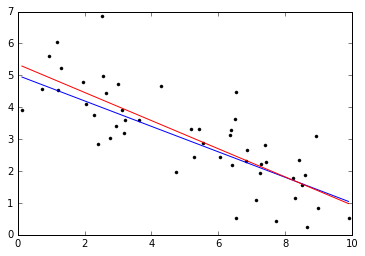

In [226]:
plt.plot(x, y, 'k.')
plt.plot([xmin, xmax], [b0+b1*xmin, b0+b1*xmax], 'b-')
plt.plot([xmin, xmax], [b0hat+b1hat*xmin, b0hat+b1hat*xmax], 'r-')

## Multiple linear regression

We usually have more features. In this case the model becomes

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... \beta_p X_p + \epsilon$$

where again

$$\epsilon \sim N(0, \sigma)$$

And again, we find the best-fit $\beta$

$$\begin{align}
\hat y & = \hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2 + ... \hat \beta_p X_p \\
       & = X^T \beta
\end{align}$$


## The assumptions of linear regression

The **Gauss–Markov theorem** states that, if certain assumptions are true, then the best linear unbiased estimator (BLUE) is given by ordinary least squares.
 * Linearity
 * Full rank
 * Exogeneity of regressors
 * Spherical errors
     * Homoscedastic
     * No autocorrelation
     
### Linearity

The main assumption of linear regression. What's an example of a non-linear relationship?

### Full rank

The various features that make up $X$ must be lineararly independent. If not, we need to drop one or more of them.

In practice, that's generally true, but partial multicollinearity has a cost.

The variable inflation factor is measure of how the variance of parameter estimates are affected by additional variables.

### Exogeneity

Exogeneity assumes that the features are uncorrelated with the errors, i.e., $\mathbb E[x_i \epsilon_i] = 0$

Endogeneity could arise because:
 * measurement error correlates with the features (e.g., if one class of people  underreports their income)
 * an unobserved variable correlates with the features, e.g.

$$income_i = \beta_0 + \beta_{educ} educ_i + \epsilon_i$$


### Spherical errors

That is, the variance of the errors in sample space is spherically symmetric.

This is usually seen as having two parts. First, that there is no autocorrelation: the errors at one point are uncorrelated with those at another. We'll revisit this when we talk about time series.

Second, the errors are homoscedastic, i.e., that the variance is uncorrelated with the features. Often heteroscedasticity can be fixed by transforming the data. The Goldfeld-Quandt test evaluates this.

### Normal distribution of residuals

#### Q-Q plots

Quantile-quantile plots are used to compare two distributions to determine if points at the same quantiles fall the same relative distance from the mean. Plotting against a normal distribution is a good way to test for normality.

In [203]:
def qq_plot(actual, label, ax0):
    base = scs.norm(0,1)
    actual = sorted(actual)
    theoretical = base.ppf(np.arange(len(actual))/float(len(actual)))
    ax0.plot(theoretical, actual, '.')

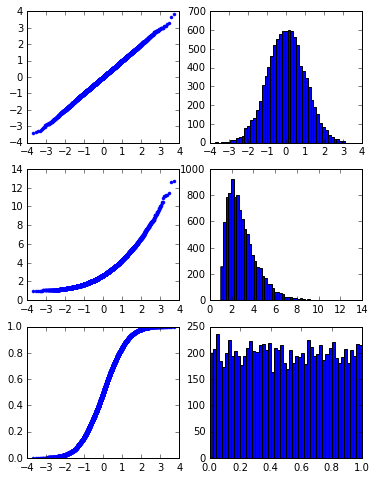

In [205]:
fig, axes = plt.subplots(3,2, figsize=(6,8))
for i, dist in zip(range(0,3),
                   [scs.norm(0,1), scs.gamma(2,1), scs.uniform(0,1)]):
    data = dist.rvs(size=10000)
    qq_plot(data, "foo", axes[i][0])
    axes[i][1].hist(data, bins=50)